# 🏏 HBL PSL 2026 Cricket Players Auction Analysis

This notebook provides a comprehensive analysis of the HBL Pakistan Super League 2026 player auction prices.

## 📊 Dataset Overview
- **Total Players**: 27
- **Columns**: Player names (Urdu & English), Prices (Urdu text & numeric)
- **Currency**: Pakistani Rupees (PKR)

## 1️⃣ Import Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

# Plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Figure size default
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 2️⃣ Load the Dataset

In [2]:
# Load the CSV file
df = pd.read_csv('/kaggle/input/hbl-psl-2026-cricket-players-auction-prices/list of cricket players and prices for HBL PSL 2026.csv')

# Display first few rows
print("📋 First 5 rows of the dataset:")
df.head()

📋 First 5 rows of the dataset:


,Player Name (Urdu),Player Name (English),Price (Urdu),Price (Numeric Estimate)
0,نسیم شاہ,Naseem Shah,8 کروڑ 65 لاکھ روپے,"86,500,000"
1,فہیم اشرف,Faheem Ashraf,8 کروڑ 50 لاکھ روپے,"85,000,000"
2,ڈیرل مچل,Daryl Mitchell,8 کروڑ 5 لاکھ روپے,"80,500,000"
3,فخر زمان,Fakhar Zaman,7 کروڑ 95 لاکھ روپے,"79,500,000"
4,ڈیوڈ وارنر,David Warner,7 کروڑ 90 لاکھ روپے,"79,000,000"


## 3️⃣ Data Exploration & Information

In [3]:
# Dataset shape
print(f"📐 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")

# Column names
print("📝 Column Names:")
print(df.columns.tolist())
print()

# Data types
print("🔍 Data Types:")
print(df.dtypes)
print()

# Basic info
print("ℹ️ Dataset Info:")
df.info()

📐 Dataset Shape: 27 rows × 4 columns

📝 Column Names:
['Player Name (Urdu)', 'Player Name (English)', 'Price (Urdu)', 'Price (Numeric Estimate)']

🔍 Data Types:
Player Name (Urdu)          object
Player Name (English)       object
Price (Urdu)                object
Price (Numeric Estimate)    object
dtype: object

ℹ️ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Player Name (Urdu)        27 non-null     object
 1   Player Name (English)     27 non-null     object
 2   Price (Urdu)              27 non-null     object
 3   Price (Numeric Estimate)  27 non-null     object
dtypes: object(4)
memory usage: 996.0+ bytes


In [4]:
# Check for missing values
print("🔎 Missing Values Check:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\n✅ Total missing values: {missing_values.sum()}")

🔎 Missing Values Check:
Player Name (Urdu)          0
Player Name (English)       0
Price (Urdu)                0
Price (Numeric Estimate)    0
dtype: int64

✅ Total missing values: 0


In [5]:
# Display all player names (English)
print("🏏 All Players in the Dataset:")
for idx, player in enumerate(df['Player Name (English)'], 1):
    print(f"{idx:2d}. {player}")

🏏 All Players in the Dataset:
 1. Naseem Shah
 2. Faheem Ashraf
 3. Daryl Mitchell
 4. Fakhar Zaman
 5. David Warner
 6. Haris Rauf
 7. Khawaja Nafay
 8. Salman Ali Agha
 9. Sahibzada Farhan
10. Rilee Rossouw
11. Mohammad Amir
12. Usama Mir
13. Azam Khan
14. Kusal Perera
15. Rishad Hossain
16. Khurram Shahzad
17. Ubaid Shah
18. Jahandad Khan
19. Mohammad Haris
20. Mohammad Ali
21. Max Bryant
22. Aamer Jamal
23. Mehran Mumtaz
24. Faisal Akram
25. Arafat Minhas
26. Haseebullah Khan
27. Jahanzeb Sultan


## 4️⃣ Statistical Summary

In [6]:
# Convert price to numeric (remove commas)
df['Price_PKR'] = df['Price (Numeric Estimate)'].str.replace(',', '').astype(float)

# Statistical summary
print("📊 Statistical Summary of Player Prices (PKR):")
print(df['Price_PKR'].describe())
print()

# Additional statistics
print("💰 Price Statistics:")
print(f"Total Auction Value: PKR {df['Price_PKR'].sum():,.0f}")
print(f"Average Price: PKR {df['Price_PKR'].mean():,.0f}")
print(f"Median Price: PKR {df['Price_PKR'].median():,.0f}")
print(f"Highest Price: PKR {df['Price_PKR'].max():,.0f}")
print(f"Lowest Price: PKR {df['Price_PKR'].min():,.0f}")
print(f"Price Range: PKR {df['Price_PKR'].max() - df['Price_PKR'].min():,.0f}")
print(f"Standard Deviation: PKR {df['Price_PKR'].std():,.0f}")

📊 Statistical Summary of Player Prices (PKR):
count    2.700000e+01
mean     4.144444e+07
std      2.670650e+07
min      6.000000e+06
25%      2.050000e+07
50%      3.100000e+07
75%      6.175000e+07
max      8.650000e+07
Name: Price_PKR, dtype: float64

💰 Price Statistics:
Total Auction Value: PKR 1,119,000,000
Average Price: PKR 41,444,444
Median Price: PKR 31,000,000
Highest Price: PKR 86,500,000
Lowest Price: PKR 6,000,000
Price Range: PKR 80,500,000
Standard Deviation: PKR 26,706,501


## 5️⃣ Top & Bottom Players by Price

In [7]:
# Top 10 most expensive players
print("🔝 Top 10 Most Expensive Players:\n")
top_10 = df.nlargest(10, 'Price_PKR')[['Player Name (English)', 'Price (Urdu)', 'Price_PKR']]
top_10_display = top_10.copy()
top_10_display['Price_PKR'] = top_10_display['Price_PKR'].apply(lambda x: f"PKR {x:,.0f}")
print(top_10_display.to_string(index=False))

🔝 Top 10 Most Expensive Players:

Player Name (English)        Price (Urdu)      Price_PKR
          Naseem Shah 8 کروڑ 65 لاکھ روپے PKR 86,500,000
        Faheem Ashraf 8 کروڑ 50 لاکھ روپے PKR 85,000,000
       Daryl Mitchell  8 کروڑ 5 لاکھ روپے PKR 80,500,000
         Fakhar Zaman 7 کروڑ 95 لاکھ روپے PKR 79,500,000
         David Warner 7 کروڑ 90 لاکھ روپے PKR 79,000,000
           Haris Rauf 7 کروڑ 60 لاکھ روپے PKR 76,000,000
        Khawaja Nafay 6 کروڑ 50 لاکھ روپے PKR 65,000,000
      Salman Ali Agha 5 کروڑ 85 لاکھ روپے PKR 58,500,000
     Sahibzada Farhan 5 کروڑ 70 لاکھ روپے PKR 57,000,000
        Rilee Rossouw 5 کروڑ 55 لاکھ روپے PKR 55,500,000


In [8]:
# Bottom 10 least expensive players
print("🔻 Bottom 10 Least Expensive Players:\n")
bottom_10 = df.nsmallest(10, 'Price_PKR')[['Player Name (English)', 'Price (Urdu)', 'Price_PKR']]
bottom_10_display = bottom_10.copy()
bottom_10_display['Price_PKR'] = bottom_10_display['Price_PKR'].apply(lambda x: f"PKR {x:,.0f}")
print(bottom_10_display.to_string(index=False))

🔻 Bottom 10 Least Expensive Players:

Player Name (English)        Price (Urdu)      Price_PKR
      Jahanzeb Sultan        60 لاکھ روپے  PKR 6,000,000
        Arafat Minhas 1 کروڑ 10 لاکھ روپے PKR 11,000,000
     Haseebullah Khan 1 کروڑ 10 لاکھ روپے PKR 11,000,000
        Mehran Mumtaz 1 کروڑ 25 لاکھ روپے PKR 12,500,000
         Faisal Akram 1 کروڑ 25 لاکھ روپے PKR 12,500,000
          Aamer Jamal 1 کروڑ 90 لاکھ روپے PKR 19,000,000
           Max Bryant 1 کروڑ 95 لاکھ روپے PKR 19,500,000
         Mohammad Ali 2 کروڑ 15 لاکھ روپے PKR 21,500,000
       Mohammad Haris 2 کروڑ 20 لاکھ روپے PKR 22,000,000
        Jahandad Khan 2 کروڑ 50 لاکھ روپے PKR 25,000,000


## 6️⃣ Data Visualizations

### 📊 Distribution of Player Prices

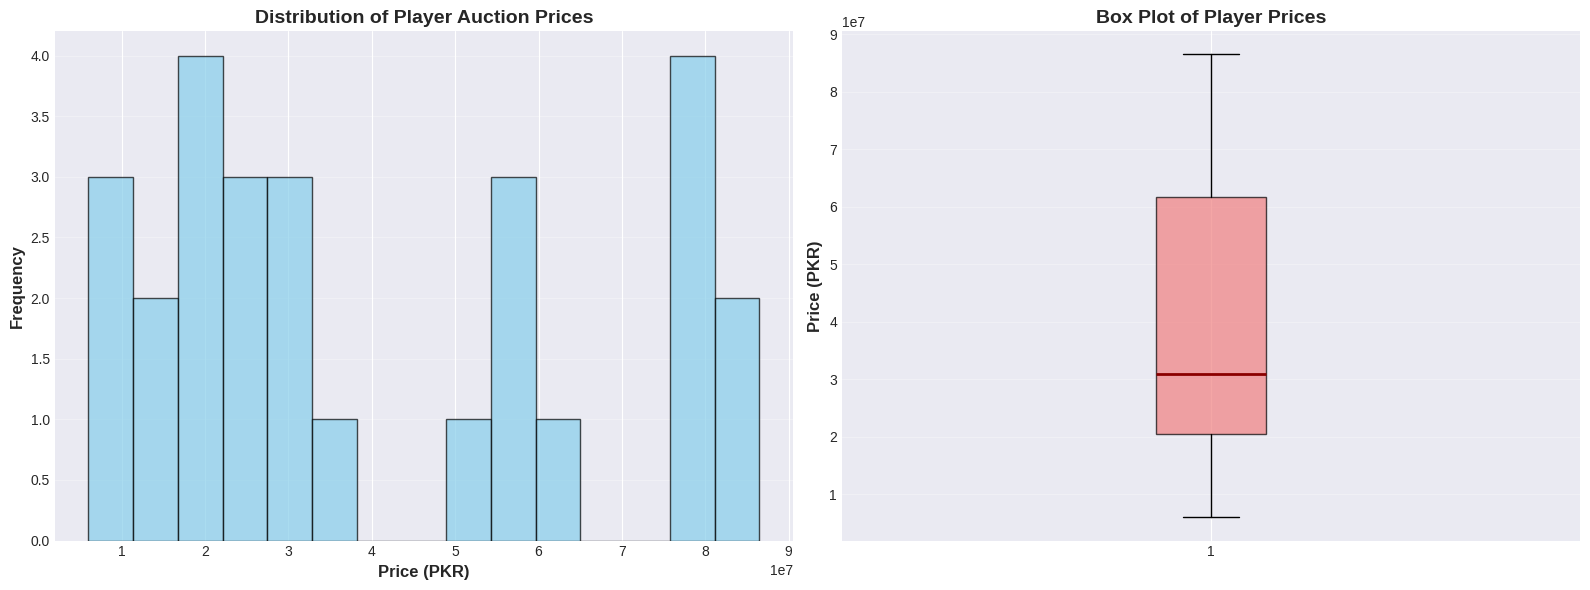

In [9]:
# Histogram of prices
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
ax[0].hist(df['Price_PKR'], bins=15, color='skyblue', edgecolor='black', alpha=0.7)
ax[0].set_xlabel('Price (PKR)', fontsize=12, fontweight='bold')
ax[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax[0].set_title('Distribution of Player Auction Prices', fontsize=14, fontweight='bold')
ax[0].grid(axis='y', alpha=0.3)

# Box plot
ax[1].boxplot(df['Price_PKR'], vert=True, patch_artist=True,
              boxprops=dict(facecolor='lightcoral', alpha=0.7),
              medianprops=dict(color='darkred', linewidth=2))
ax[1].set_ylabel('Price (PKR)', fontsize=12, fontweight='bold')
ax[1].set_title('Box Plot of Player Prices', fontsize=14, fontweight='bold')
ax[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 🏆 Top 10 Players Bar Chart

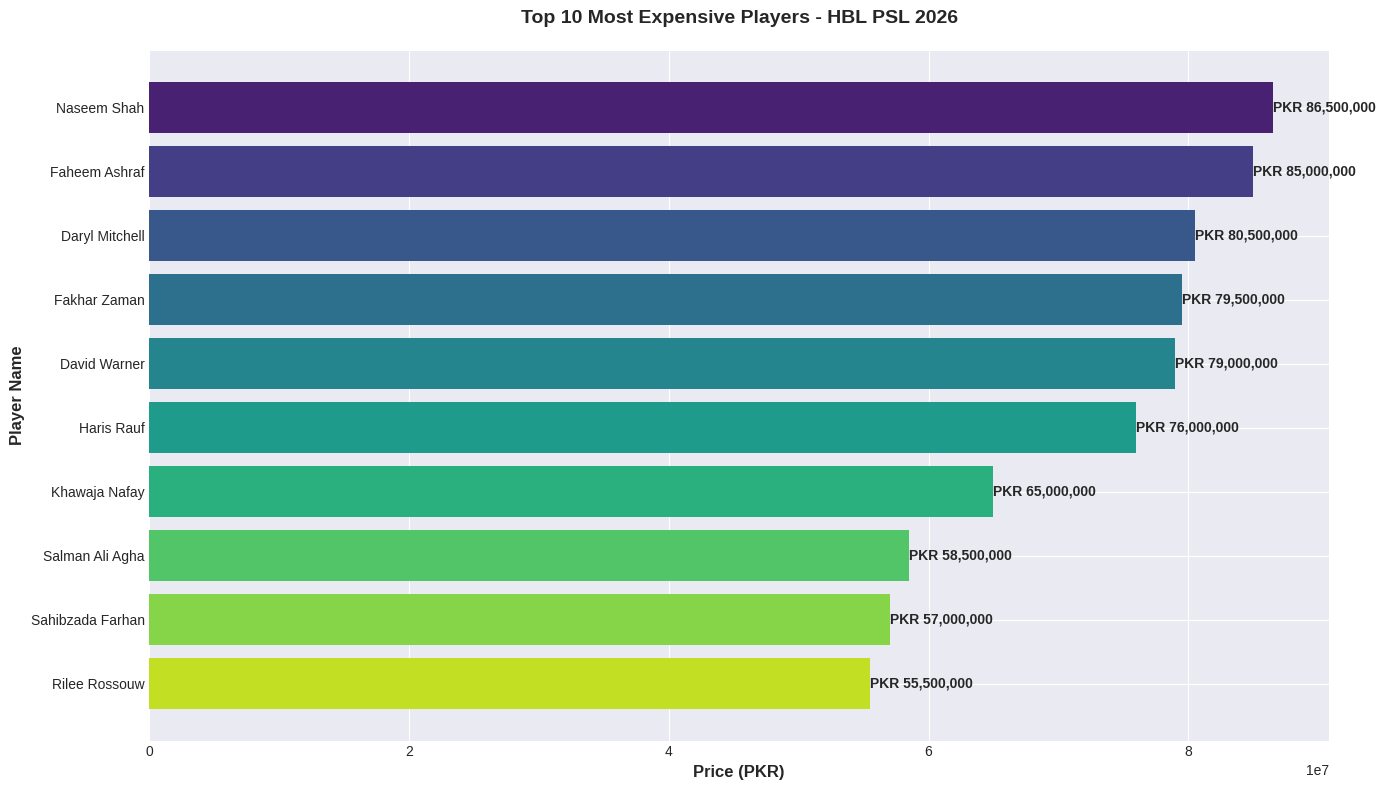

In [10]:
# Bar chart of top 10 players
top_10_players = df.nlargest(10, 'Price_PKR')

plt.figure(figsize=(14, 8))
bars = plt.barh(top_10_players['Player Name (English)'], 
                top_10_players['Price_PKR'], 
                color=sns.color_palette('viridis', 10))

plt.xlabel('Price (PKR)', fontsize=12, fontweight='bold')
plt.ylabel('Player Name', fontsize=12, fontweight='bold')
plt.title('Top 10 Most Expensive Players - HBL PSL 2026', fontsize=14, fontweight='bold', pad=20)
plt.gca().invert_yaxis()

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'PKR {width:,.0f}',
             ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### 📈 Price Ranking - All Players

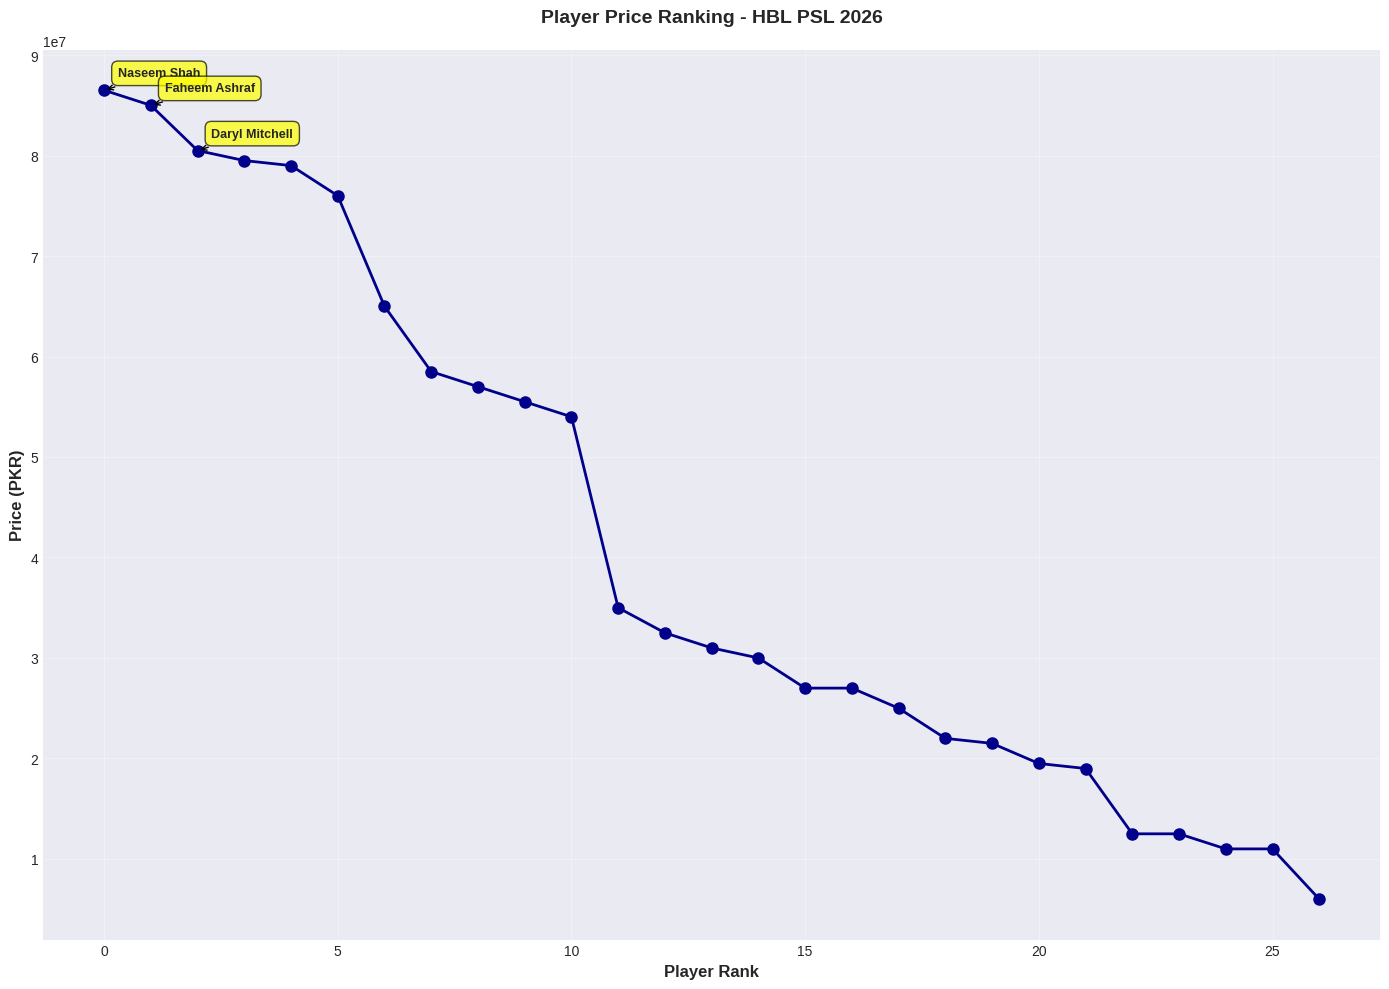

In [11]:
# Sort by price and create ranking
df_sorted = df.sort_values('Price_PKR', ascending=False).reset_index(drop=True)

plt.figure(figsize=(14, 10))
plt.plot(range(len(df_sorted)), df_sorted['Price_PKR'], 
         marker='o', linestyle='-', linewidth=2, markersize=8, color='darkblue')

plt.xlabel('Player Rank', fontsize=12, fontweight='bold')
plt.ylabel('Price (PKR)', fontsize=12, fontweight='bold')
plt.title('Player Price Ranking - HBL PSL 2026', fontsize=14, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3)

# Annotate top 3 players
for i in range(3):
    plt.annotate(df_sorted.iloc[i]['Player Name (English)'],
                xy=(i, df_sorted.iloc[i]['Price_PKR']),
                xytext=(10, 10), textcoords='offset points',
                fontsize=9, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.show()

### 🥧 Price Distribution by Categories

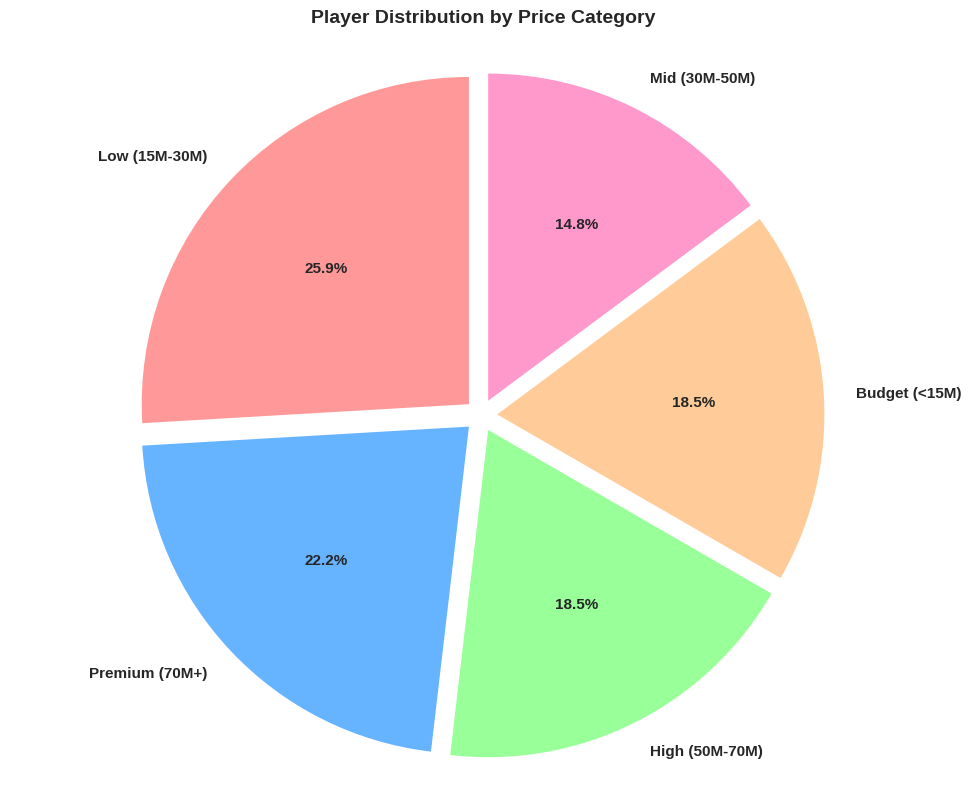


📊 Player Count by Price Category:
Price_Category
Low (15M-30M)     7
Premium (70M+)    6
High (50M-70M)    5
Budget (<15M)     5
Mid (30M-50M)     4
Name: count, dtype: int64


In [12]:
# Create price categories
def categorize_price(price):
    if price >= 70000000:
        return 'Premium (70M+)'
    elif price >= 50000000:
        return 'High (50M-70M)'
    elif price >= 30000000:
        return 'Mid (30M-50M)'
    elif price >= 15000000:
        return 'Low (15M-30M)'
    else:
        return 'Budget (<15M)'

df['Price_Category'] = df['Price_PKR'].apply(categorize_price)

# Count players in each category
category_counts = df['Price_Category'].value_counts()

# Pie chart
plt.figure(figsize=(10, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors, explode=explode,
        textprops={'fontsize': 11, 'fontweight': 'bold'})

plt.title('Player Distribution by Price Category', fontsize=14, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

print("\n📊 Player Count by Price Category:")
print(category_counts)

## 7️⃣ Advanced Analysis

### 💡 Price Insights

In [13]:
# Calculate percentiles
percentiles = [10, 25, 50, 75, 90, 95]
print("📊 Price Percentiles:\n")
for p in percentiles:
    value = np.percentile(df['Price_PKR'], p)
    print(f"{p}th percentile: PKR {value:,.0f}")

# Calculate price in Crores for better readability
df['Price_Crores'] = df['Price_PKR'] / 10000000

print("\n💰 Price in Crores (1 Crore = 10 Million):")
print(f"Average: {df['Price_Crores'].mean():.2f} Crore")
print(f"Median: {df['Price_Crores'].median():.2f} Crore")

📊 Price Percentiles:

10th percentile: PKR 11,900,000
25th percentile: PKR 20,500,000
50th percentile: PKR 31,000,000
75th percentile: PKR 61,750,000
90th percentile: PKR 79,900,000
95th percentile: PKR 83,650,000

💰 Price in Crores (1 Crore = 10 Million):
Average: 4.14 Crore
Median: 3.10 Crore


### 🎯 Identify Potential Player Types (Based on Price)

In [14]:
# Assuming higher prices indicate star players
# This is a simple heuristic - actual player roles would require additional data

star_players = df[df['Price_PKR'] >= 70000000]
experienced_players = df[(df['Price_PKR'] >= 30000000) & (df['Price_PKR'] < 70000000)]
emerging_players = df[df['Price_PKR'] < 30000000]

print("⭐ Star Players (70M+):")
print(star_players[['Player Name (English)', 'Price_Crores']].to_string(index=False))
print(f"\nTotal: {len(star_players)} players\n")

print("\n🏏 Experienced Players (30M-70M):")
print(experienced_players[['Player Name (English)', 'Price_Crores']].to_string(index=False))
print(f"\nTotal: {len(experienced_players)} players\n")

print("\n🌟 Emerging/Budget Players (<30M):")
print(emerging_players[['Player Name (English)', 'Price_Crores']].to_string(index=False))
print(f"\nTotal: {len(emerging_players)} players")

⭐ Star Players (70M+):
Player Name (English)  Price_Crores
          Naseem Shah          8.65
        Faheem Ashraf          8.50
       Daryl Mitchell          8.05
         Fakhar Zaman          7.95
         David Warner          7.90
           Haris Rauf          7.60

Total: 6 players


🏏 Experienced Players (30M-70M):
Player Name (English)  Price_Crores
        Khawaja Nafay          6.50
      Salman Ali Agha          5.85
     Sahibzada Farhan          5.70
        Rilee Rossouw          5.55
        Mohammad Amir          5.40
            Usama Mir          3.50
            Azam Khan          3.25
         Kusal Perera          3.10
       Rishad Hossain          3.00

Total: 9 players


🌟 Emerging/Budget Players (<30M):
Player Name (English)  Price_Crores
      Khurram Shahzad          2.70
           Ubaid Shah          2.70
        Jahandad Khan          2.50
       Mohammad Haris          2.20
         Mohammad Ali          2.15
           Max Bryant          1.95
      

### 📉 Price Variance Analysis

In [15]:
# Coefficient of Variation (CV) - measure of relative variability
cv = (df['Price_PKR'].std() / df['Price_PKR'].mean()) * 100

print("📊 Price Variability Analysis:\n")
print(f"Standard Deviation: PKR {df['Price_PKR'].std():,.0f}")
print(f"Coefficient of Variation: {cv:.2f}%")
print(f"\nInterpretation: {'High variability' if cv > 30 else 'Moderate variability' if cv > 15 else 'Low variability'} in player prices")

# Interquartile Range (IQR)
Q1 = df['Price_PKR'].quantile(0.25)
Q3 = df['Price_PKR'].quantile(0.75)
IQR = Q3 - Q1

print(f"\nInterquartile Range (IQR): PKR {IQR:,.0f}")
print(f"Q1 (25th percentile): PKR {Q1:,.0f}")
print(f"Q3 (75th percentile): PKR {Q3:,.0f}")

📊 Price Variability Analysis:

Standard Deviation: PKR 26,706,501
Coefficient of Variation: 64.44%

Interpretation: High variability in player prices

Interquartile Range (IQR): PKR 41,250,000
Q1 (25th percentile): PKR 20,500,000
Q3 (75th percentile): PKR 61,750,000


## 8️⃣ Export Analyzed Data

In [16]:
# Create a summary dataframe with additional columns
df_export = df.copy()
df_export['Rank'] = df_export['Price_PKR'].rank(ascending=False, method='min').astype(int)
df_export = df_export.sort_values('Rank')

# Select columns for export
export_columns = ['Rank', 'Player Name (English)', 'Player Name (Urdu)', 
                  'Price_PKR', 'Price_Crores', 'Price_Category']
df_export_final = df_export[export_columns]

# Save to CSV
df_export_final.to_csv('psl_2026_analyzed.csv', index=False)
print("✅ Analyzed data exported to 'psl_2026_analyzed.csv'")

# Display the exported data
print("\n📋 Preview of Exported Data:")
df_export_final.head(10)

✅ Analyzed data exported to 'psl_2026_analyzed.csv'

📋 Preview of Exported Data:


,Rank,Player Name (English),Player Name (Urdu),Price_PKR,Price_Crores,Price_Category
0,1,Naseem Shah,نسیم شاہ,86500000.0,8.65,Premium (70M+)
1,2,Faheem Ashraf,فہیم اشرف,85000000.0,8.50,Premium (70M+)
2,3,Daryl Mitchell,ڈیرل مچل,80500000.0,8.05,Premium (70M+)
3,4,Fakhar Zaman,فخر زمان,79500000.0,7.95,Premium (70M+)
4,5,David Warner,ڈیوڈ وارنر,79000000.0,7.90,Premium (70M+)
5,6,Haris Rauf,حارث رؤف,76000000.0,7.60,Premium (70M+)
6,7,Khawaja Nafay,خواجہ نافع,65000000.0,6.50,High (50M-70M)
7,8,Salman Ali Agha,سلمان علی آغا,58500000.0,5.85,High (50M-70M)
8,9,Sahibzada Farhan,صاحبزادہ فرحان,57000000.0,5.70,High (50M-70M)
9,10,Rilee Rossouw,رائیلی روسو,55500000.0,5.55,High (50M-70M)


## 9️⃣ Key Findings & Insights

In [17]:
print("="*80)
print("🔍 KEY FINDINGS - HBL PSL 2026 AUCTION ANALYSIS")
print("="*80)

print(f"\n1️⃣ AUCTION OVERVIEW")
print(f"   • Total Players Auctioned: {len(df)}")
print(f"   • Total Auction Value: PKR {df['Price_PKR'].sum():,.0f} ({df['Price_Crores'].sum():.2f} Crore)")

print(f"\n2️⃣ PRICE STATISTICS")
print(f"   • Highest Price: {df.loc[df['Price_PKR'].idxmax(), 'Player Name (English)']} - PKR {df['Price_PKR'].max():,.0f}")
print(f"   • Lowest Price: {df.loc[df['Price_PKR'].idxmin(), 'Player Name (English)']} - PKR {df['Price_PKR'].min():,.0f}")
print(f"   • Average Price: PKR {df['Price_PKR'].mean():,.0f} ({df['Price_Crores'].mean():.2f} Crore)")
print(f"   • Median Price: PKR {df['Price_PKR'].median():,.0f} ({df['Price_Crores'].median():.2f} Crore)")

print(f"\n3️⃣ PRICE DISTRIBUTION")
print(f"   • Premium Players (70M+): {len(star_players)} ({len(star_players)/len(df)*100:.1f}%)")
print(f"   • Experienced Players (30M-70M): {len(experienced_players)} ({len(experienced_players)/len(df)*100:.1f}%)")
print(f"   • Emerging/Budget Players (<30M): {len(emerging_players)} ({len(emerging_players)/len(df)*100:.1f}%)")

print(f"\n4️⃣ MARKET INSIGHTS")
print(f"   • Price Variability: {cv:.2f}% (Coefficient of Variation)")
print(f"   • Price Range: PKR {df['Price_PKR'].max() - df['Price_PKR'].min():,.0f}")
print(f"   • Top 3 players account for: {df.nlargest(3, 'Price_PKR')['Price_PKR'].sum()/df['Price_PKR'].sum()*100:.1f}% of total value")

print(f"\n5️⃣ TOP 3 MOST VALUABLE PLAYERS")
for i, row in df.nlargest(3, 'Price_PKR').iterrows():
    print(f"   {int(row['Price_PKR']/df['Price_PKR'].max()*100)}% • {row['Player Name (English)']} - PKR {row['Price_PKR']:,.0f}")

print("\n" + "="*80)
print("✅ Analysis Complete!")
print("="*80)

🔍 KEY FINDINGS - HBL PSL 2026 AUCTION ANALYSIS

1️⃣ AUCTION OVERVIEW
   • Total Players Auctioned: 27
   • Total Auction Value: PKR 1,119,000,000 (111.90 Crore)

2️⃣ PRICE STATISTICS
   • Highest Price: Naseem Shah - PKR 86,500,000
   • Lowest Price: Jahanzeb Sultan - PKR 6,000,000
   • Average Price: PKR 41,444,444 (4.14 Crore)
   • Median Price: PKR 31,000,000 (3.10 Crore)

3️⃣ PRICE DISTRIBUTION
   • Premium Players (70M+): 6 (22.2%)
   • Experienced Players (30M-70M): 9 (33.3%)
   • Emerging/Budget Players (<30M): 12 (44.4%)

4️⃣ MARKET INSIGHTS
   • Price Variability: 64.44% (Coefficient of Variation)
   • Price Range: PKR 80,500,000
   • Top 3 players account for: 22.5% of total value

5️⃣ TOP 3 MOST VALUABLE PLAYERS
   100% • Naseem Shah - PKR 86,500,000
   98% • Faheem Ashraf - PKR 85,000,000
   93% • Daryl Mitchell - PKR 80,500,000

✅ Analysis Complete!


---

## 📚 Conclusion

This analysis provides comprehensive insights into the HBL PSL 2026 player auction:

✅ **Data Quality**: Clean dataset with no missing values  
✅ **Price Distribution**: Wide range from PKR 6M to 86.5M  
✅ **Market Segmentation**: Clear tiers of player valuations  
✅ **Visualizations**: Multiple charts for easy interpretation  

### 🎯 Potential Further Analysis:
- Player nationality analysis (Pakistani vs International)
- Player role analysis (Batsman, Bowler, All-rounder) - requires additional data
- Team-wise distribution - requires franchise information
- Historical price comparison with previous PSL seasons
- Performance vs Price correlation - requires match statistics

---

**Dataset Source**: HBL PSL 2026 Official Auction  
**Analysis Date**: February 2026  
**Notebook Version**: 1.0  